<a href="https://colab.research.google.com/github/DianaBravoPerez/EDP-1/blob/main/caminata_aleatoria_1D_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caminata Aleatoria 1D**

---



Una caminata aleatoria en 1D es básicamente imaginar que una partícula  está parada en el cero y en cada paso decide si va a la derecha o a la izquierda según una probabilidad.

En este caso:
- Se mueve a la derecha con probabilidad $p$
- Se mueve a la izquierda con probabilidad $q = 1-p$

La posición en el paso $n$ sería:

$$X_n = X_{n-1} + \xi_n$$

donde $\xi_n$ vale $+1$ con probabilidad $p$ y $-1$ con probabilidad $q$.

Si sumamos todos los pasos desde el inicio:

$$X_N = \sum_{i=1}^{N} \xi_i$$

**Valor esperado**

El promedio de cada paso es:

$$\langle \xi \rangle = p - q = 2p - 1$$

Entonces después de $N$ pasos el promedio de la posición es:

$$\langle X_N \rangle = N(2p-1)$$

Si $p = 0.5$ esto da cero, o sea que no hay tendencia hacia ningún lado (tiene sentido).

**Desviación estándar**

La dispersión de las trayectorias crece con el número de pasos así:

$$\sigma_N = 2\sqrt{pqN}$$

O sea que entre más pasos, más se separan las trayectorias entre sí

---
## Código

Primero importo las librerías que voy a necesitar. `numpy` es para hacer los cálculos con arreglos, `matplotlib` para graficar, `scipy` tiene funciones estadísticas ya hechas, y `ipywidgets` es para hacer los sliders interactivos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import norm
from ipywidgets import interact, FloatSlider, IntSlider

%matplotlib inline

### Función para simular la caminata

Esta función genera varias caminatas al mismo tiempo. Le doy el número de pasos, la probabilidad $p$ y cuántas caminatas quiero, y me regresa todas las trayectorias en una matriz.

In [3]:
def simular_caminata(N, p, n_caminatas):

    # np.random.choice escoge aleatoriamente entre +1 y -1
    # con las probabilidades que le doy (p para la derecha, 1-p para la izquierda)
    # size=(n_caminatas, N) hace que genere varias caminatas a la vez en forma de matriz
    pasos = np.random.choice([1, -1], size=(n_caminatas, N), p=[p, 1-p])

    # np.cumsum suma los pasos de forma acumulada, eso me da la posición en cada momento
    # np.hstack pega una columna de ceros al inicio para representar la posición de partida (X=0)
    pos = np.hstack([np.zeros((n_caminatas, 1)), np.cumsum(pasos, axis=1)])

    return pos

### Función para graficar

Esta función hace dos gráficas: una con las trayectorias individuales junto con la predicción teórica, y otra con la distribución de posiciones al final de la caminata.

In [4]:
def graficar(p=0.5, N=100, n_caminatas=10):

    q = 1 - p
    t = np.arange(N + 1)  # eje de tiempo: 0, 1, 2, ..., N

    # simulo las caminatas
    pos = simular_caminata(N, p, n_caminatas)

    # calculo lo que predice la teoria
    media = (2*p - 1) * t       # valor esperado en cada paso
    sigma = 2 * np.sqrt(p*q*t)  # desviacion estandar en cada paso

    # creo la figura con dos subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
    fig.suptitle(f'Caminata aleatoria 1D — p={p:.2f}, q={q:.2f}, N={N}', fontsize=12)


    # --- grafica izquierda: trayectorias ---

    # asigno un color diferente a cada trayectoria usando un mapa de colores
    colores = cm.tab10(np.linspace(0, 0.9, n_caminatas))

    for i in range(n_caminatas):  # recorro cada caminata y la grafico
        ax1.plot(t, pos[i], alpha=0.65, lw=0.9, color=colores[i])

    # encima de las trayectorias pongo la media teorica (linea punteada)
    ax1.plot(t, media, 'k--', lw=1.8, label=r'$\langle X_N \rangle$ teórico')

    # y una banda sombreada que representa ±1 desviacion estandar
    ax1.fill_between(t, media - sigma, media + sigma,
                     alpha=0.12, color='black', label=r'$\pm\sigma$')

    ax1.axhline(0, color='gray', ls=':', lw=0.8)  # linea en cero solo de referencia
    ax1.set_xlabel('pasos n')
    ax1.set_ylabel('posición X')
    ax1.set_title('Trayectorias')
    ax1.legend(fontsize=8)
    ax1.grid(alpha=0.25)


    # --- grafica derecha: distribución de posición final ---

    # simulo muchas más caminatas (2000) para que el histograma quede bien
    pos_muchas = simular_caminata(N, p, 2000)
    xf = pos_muchas[:, -1]  # me quedo solo con la última columna = posición final

    # histograma de posiciones finales, density=True lo normaliza para compararlo con la curva teorica
    ax2.hist(xf, bins=35, density=True, color='steelblue', edgecolor='white', alpha=0.8)

    # calculo los parametros teoricos de la distribucion normal esperada
    mu_f  = (2*p - 1) * N
    sig_f = 2 * np.sqrt(p*q*N)

    # grafico la curva normal teorica encima del histograma
    xr = np.linspace(xf.min(), xf.max(), 300)
    ax2.plot(xr, norm.pdf(xr, mu_f, sig_f), 'r-', lw=2,
             label=f'Normal: μ={mu_f:.1f}, σ={sig_f:.1f}')

    ax2.set_xlabel('posición final $X_N$')
    ax2.set_ylabel('densidad')
    ax2.set_title('Distribución posición final (2000 sims)')
    ax2.legend(fontsize=8)
    ax2.grid(alpha=0.25)

    plt.tight_layout()
    plt.show()

    # imprimo los valores para comparar teoria vs simulacion
    print(f'media teórica={mu_f:.2f}  |  media simulada={xf.mean():.2f}')
    print(f'sigma teórica={sig_f:.2f}  |  sigma simulada={xf.std():.2f}')

### Widget interactivo

Con `interact` puedo conectar la función de graficar con sliders para cambiar los parámetros sin tener que modificar el código cada vez. El slider de `p` controla la probabilidad de ir a la derecha, `N` el número de pasos y `trayectorias` cuántas líneas se muestran.

In [5]:
interact(
    graficar,
    p=FloatSlider(value=0.5, min=0.1, max=0.9, step=0.05, description='p'),
    N=IntSlider(value=100, min=20, max=400, step=10, description='N (pasos)'),
    n_caminatas=IntSlider(value=10, min=1, max=25, step=1, description='trayectorias')
);

interactive(children=(FloatSlider(value=0.5, description='p', max=0.9, min=0.1, step=0.05), IntSlider(value=10…

---
### Comparación para p = 0.3, 0.5 y 0.7

Aquí grafico el promedio de 500 caminatas para tres valores distintos de $p$, para ver más claro el efecto de cambiar la probabilidad.

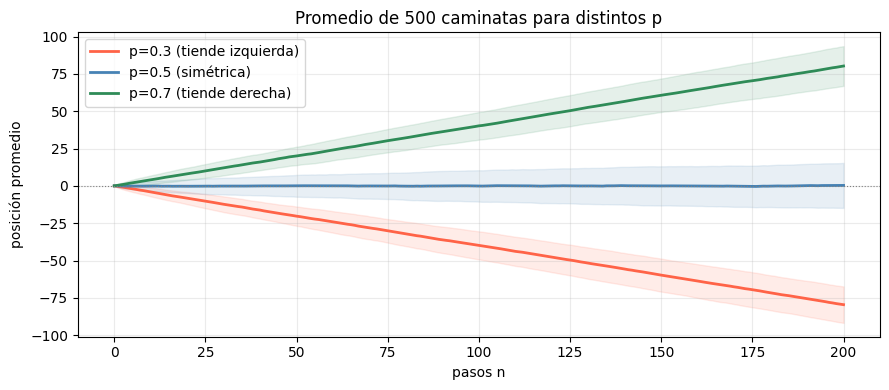

In [6]:
N = 200
t = np.arange(N + 1)

fig, ax = plt.subplots(figsize=(9, 4))

# itero sobre los tres casos que quiero comparar
for p_val, color, label in zip(
    [0.3, 0.5, 0.7],
    ['tomato', 'steelblue', 'seagreen'],
    ['p=0.3 (tiende izquierda)', 'p=0.5 (simétrica)', 'p=0.7 (tiende derecha)']
):
    pos  = simular_caminata(N, p_val, 500)
    prom = pos.mean(axis=0)  # promedio sobre todas las caminatas en cada paso
    sd   = pos.std(axis=0)   # desviacion estandar sobre todas las caminatas en cada paso

    ax.plot(t, prom, color=color, lw=2, label=label)
    ax.fill_between(t, prom - sd, prom + sd, alpha=0.12, color=color)  # banda de dispersion

ax.axhline(0, color='gray', ls=':', lw=0.8)
ax.set_xlabel('pasos n')
ax.set_ylabel('posición promedio')
ax.set_title('Promedio de 500 caminatas para distintos p')
ax.legend()
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

---
## Análisis y conclusiones

Lo primero que se nota es que cuando $p = 0.5$ las trayectorias no tienen tendencia hacia ningún lado, el promedio se queda cerca de cero aunque las trayectorias individuales sí se alejan bastante. Esto tiene sentido porque las probabilidades de ir a la derecha y a la izquierda son iguales.

Cuando $p \neq 0.5$ sí hay una tendencia clara. Con $p = 0.7$ el promedio sube consistentemente, y con $p = 0.3$ baja. La fórmula $\langle X_N \rangle = N(2p-1)$ describe bien esto.

Otra cosa interesante es que la dispersión (qué tan separadas están las trayectorias entre sí) crece con los pasos en todos los casos. No crece de forma lineal sino más lento, proporcional a $\sqrt{N}$. Esto se ve en las gráficas porque la banda gris se va abriendo pero cada vez más despacio.

La distribución de la posición final tiene forma de campana gaussiana, lo cual es lo que predice el Teorema Central del Límite ya que la posición es la suma de muchos pasos independientes. La curva roja encima del histograma coincide bastante bien con los datos simulados, lo que me dice que el código está correcto.

En resumen, la simulación coincide con la teoría y se puede ver claramente cómo el valor de $p$ controla tanto la dirección promedio del movimiento como qué tan asimétricas son las trayectorias.